# **Spotify - User Preferences Analysis:**
We aim to examine users' listening habits to understand which genres, artists, or songs are the most popular. We will create user profiles based on their musical preferences and provide personalized recommendations.

The project focuses on analyzing a dataset related to songs and artists on Spotify.
Various features were explored, such as popularity, audio characteristics, artist details, and album details, among others.


In [78]:
# Import local Kaggle file (import method may vary depending on preference). In this example, we are using Google Colab.
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import random
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder, StandardScaler
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.regularizers import l2
#from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Attempt to load the CSV file into a pandas DataFrame with different encodings
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'utf-16']

df = None
for encoding in encodings:
    try:
        df = pd.read_csv(file_name, encoding=encoding)
        break  # If reading is successful, exit the loop
    except Exception as e:
        print(f"Error reading with encoding {encoding}: {e}")

# Display the first rows of the DataFrame if loaded successfully
if df is not None:
    df.head()
else:
    print("Failed to load the file correctly.")


Saving spotify-2023.csv to spotify-2023 (1).csv
Error reading with encoding utf-8: 'utf-8' codec can't decode bytes in position 4-5: unexpected end of data


In [79]:
#Data Exploratory
df.head()
df.tail()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [81]:
print("Rows:", df.shape[0])
print(df.columns)
print(df.dtypes)


Rows: 953
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


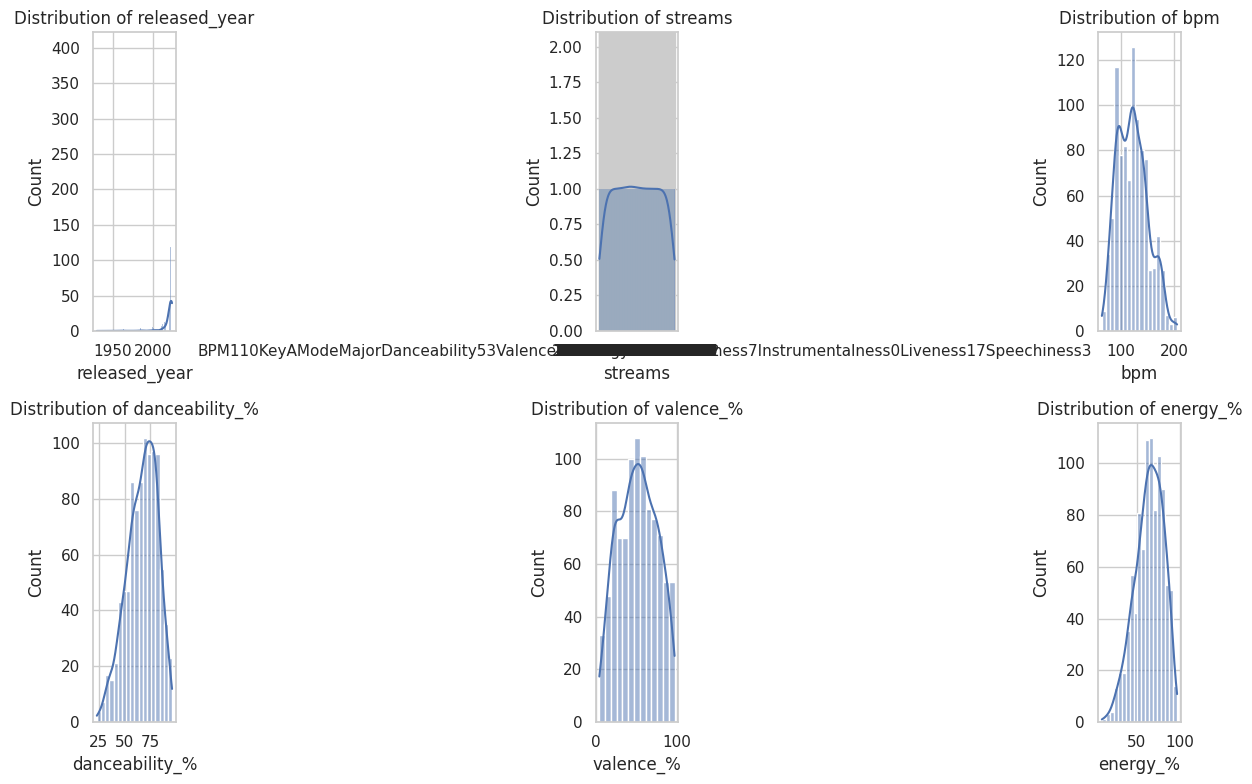

In [83]:
#Histograms of Some Available Variables
selected_columns = ['released_year', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']
plt.figure(figsize=(12, 8))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


# Calculate Metric for Artists
1°) Calculates a metric (number of streams) for artists and then visualizes the top 10 artists using a bar plot.

2°) Filters the DataFrame to include only the top 10 artists based on the number of streams. It then creates a new column 'year' by extracting the year from the 'date' column.

Text(0, 0.5, 'Quantity')

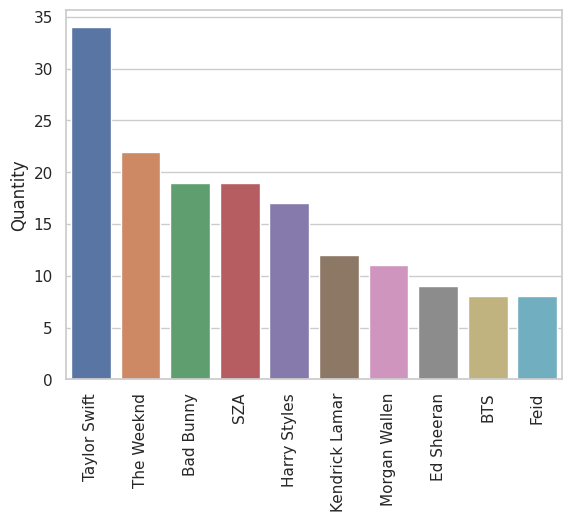

In [84]:
top_artists = df["artist(s)_name"].value_counts()[:10]

plt.figure(dpi=100)
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=90)
plt.ylabel("Quantity")


        date  released_year  released_month  released_day
0 2023-07-14           2023               7            14
1 2023-03-23           2023               3            23
2 2023-06-30           2023               6            30
3 2019-08-23           2019               8            23
4 2023-05-18           2023               5            18


<ipython-input-85-84f0b5f1b367>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_artists['year'] = pd.to_datetime(df_top_artists['date']).dt.year


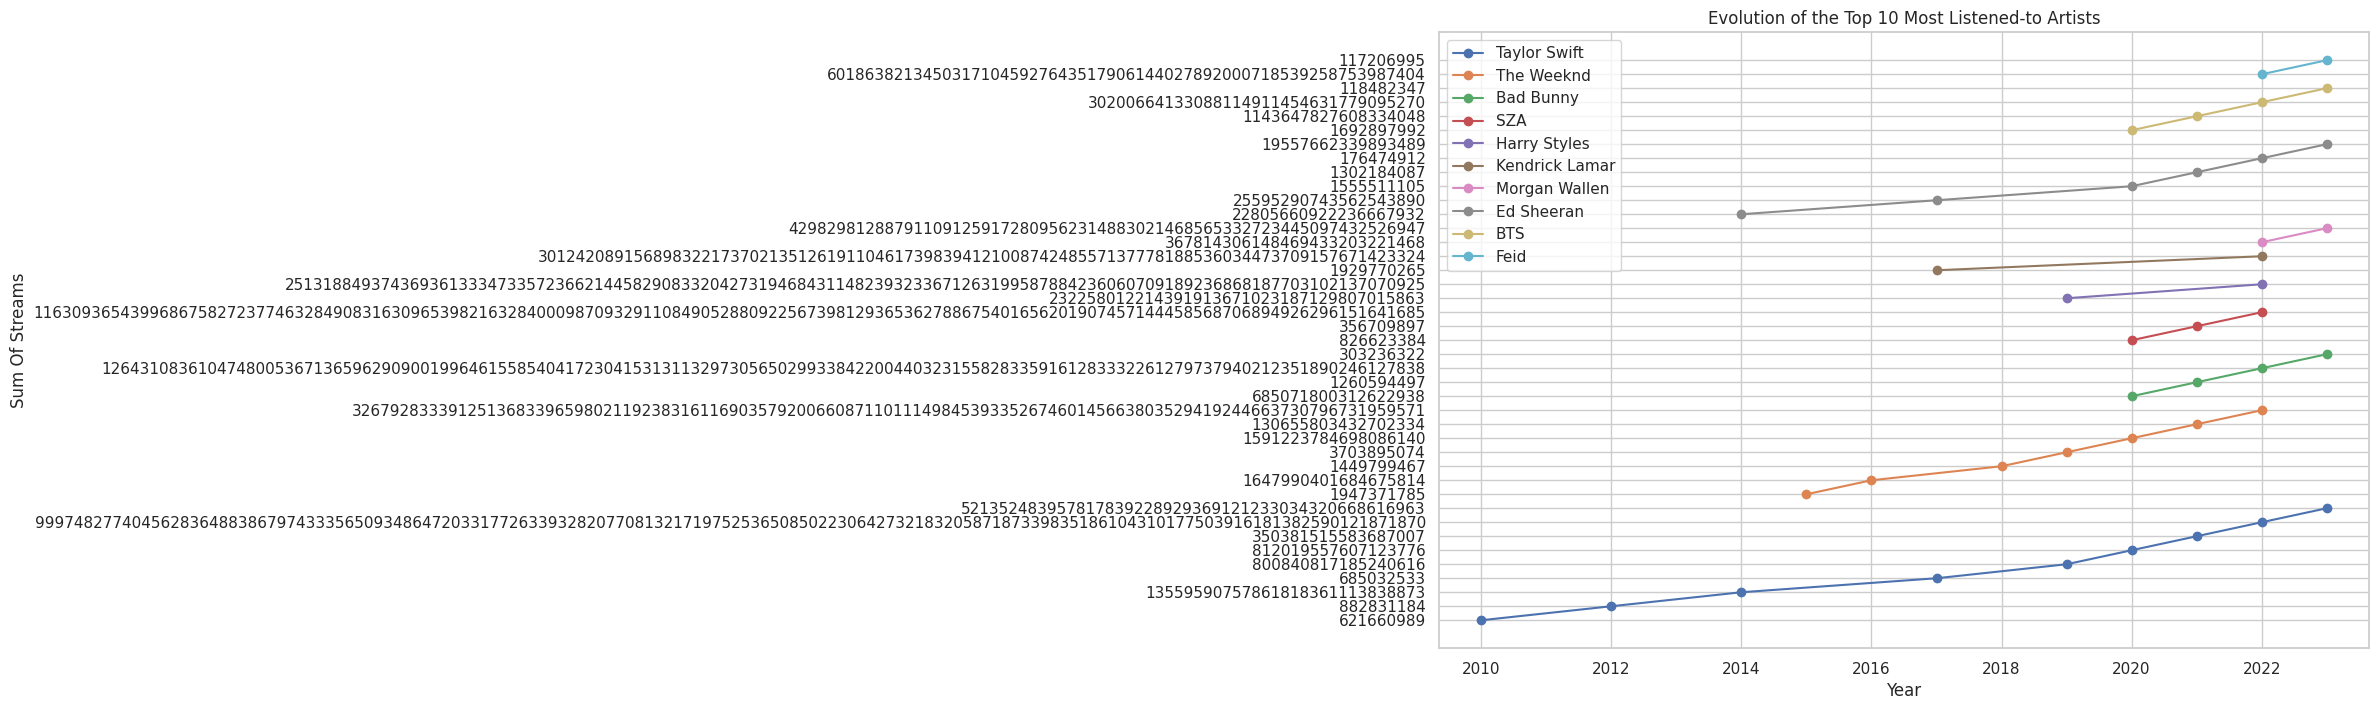

In [85]:
# Create the 'date' column by concatenating 'released_year', 'released_month', and 'released_day'
df['date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                             df['released_month'].astype(str) + '-' +
                             df['released_day'].astype(str), errors='coerce')

# Check that the 'date' column has been created correctly
print(df[['date', 'released_year', 'released_month', 'released_day']].head())


top_artists = df['artist(s)_name'].value_counts().head(10).index
df_top_artists = df[df['artist(s)_name'].isin(top_artists)]


df_top_artists['year'] = pd.to_datetime(df_top_artists['date']).dt.year


# Group by artist and year, sum the streams
streams_by_artist_year = df_top_artists.groupby(['artist(s)_name', 'year'])['streams'].sum().reset_index()

# Plot the evolution of the top 10 artists
plt.figure(figsize=(12, 8))
for artist in top_artists:
    artist_data = streams_by_artist_year[streams_by_artist_year['artist(s)_name'] == artist]
    plt.plot(artist_data['year'], artist_data['streams'], label=artist, marker='o')

plt.title('Evolution of the Top 10 Most Listened-to Artists')
plt.xlabel('Year')
plt.ylabel('Sum Of Streams')
plt.legend()
plt.show()

# Analysis of the top songs.

<Axes: xlabel='key', ylabel='count'>

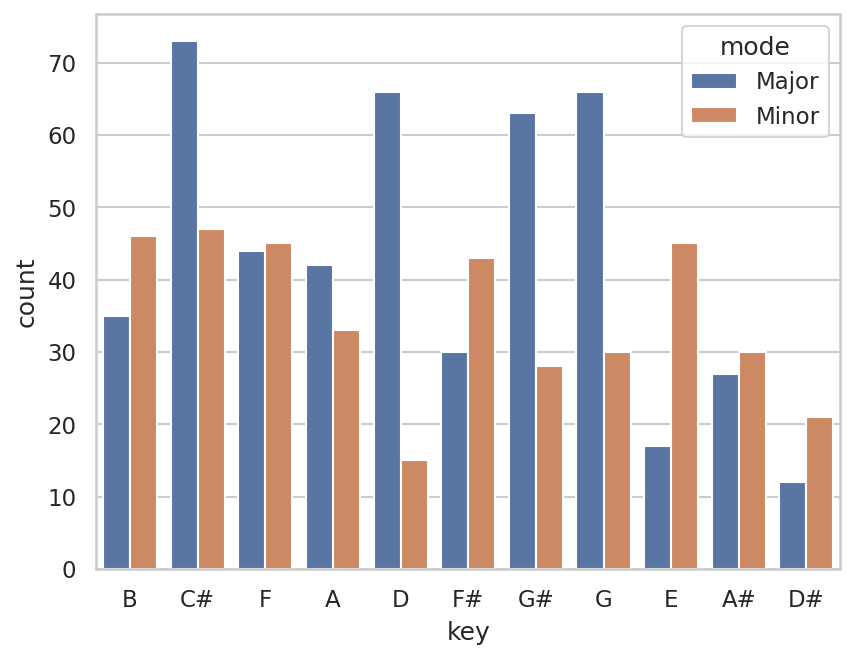

In [87]:
#Understanding the Distribution and Behavior between Key and Mode
plt.figure(dpi=150)
sns.countplot(data=df,x="key",hue="mode")

In [88]:
top_10_songs = df.sort_values("streams",ascending=False)[:10][["track_name","streams"]]
top_10_songs

,track_name,streams
574,Love Grows (Where My Rosemary Goes),BPM110KeyAModeMajorDanceability53Valence75Ener...
33,Anti-Hero,999748277
625,Arcade,991336132
253,Glimpse of Us,988515741
455,Seek & Destroy,98709329
98,Summertime Sadness,983637508
891,"Come Back Home - From ""Purple Hearts""",97610446
427,Where Are You Now,972509632
322,I Love You So,972164968
130,Queencard,96273746


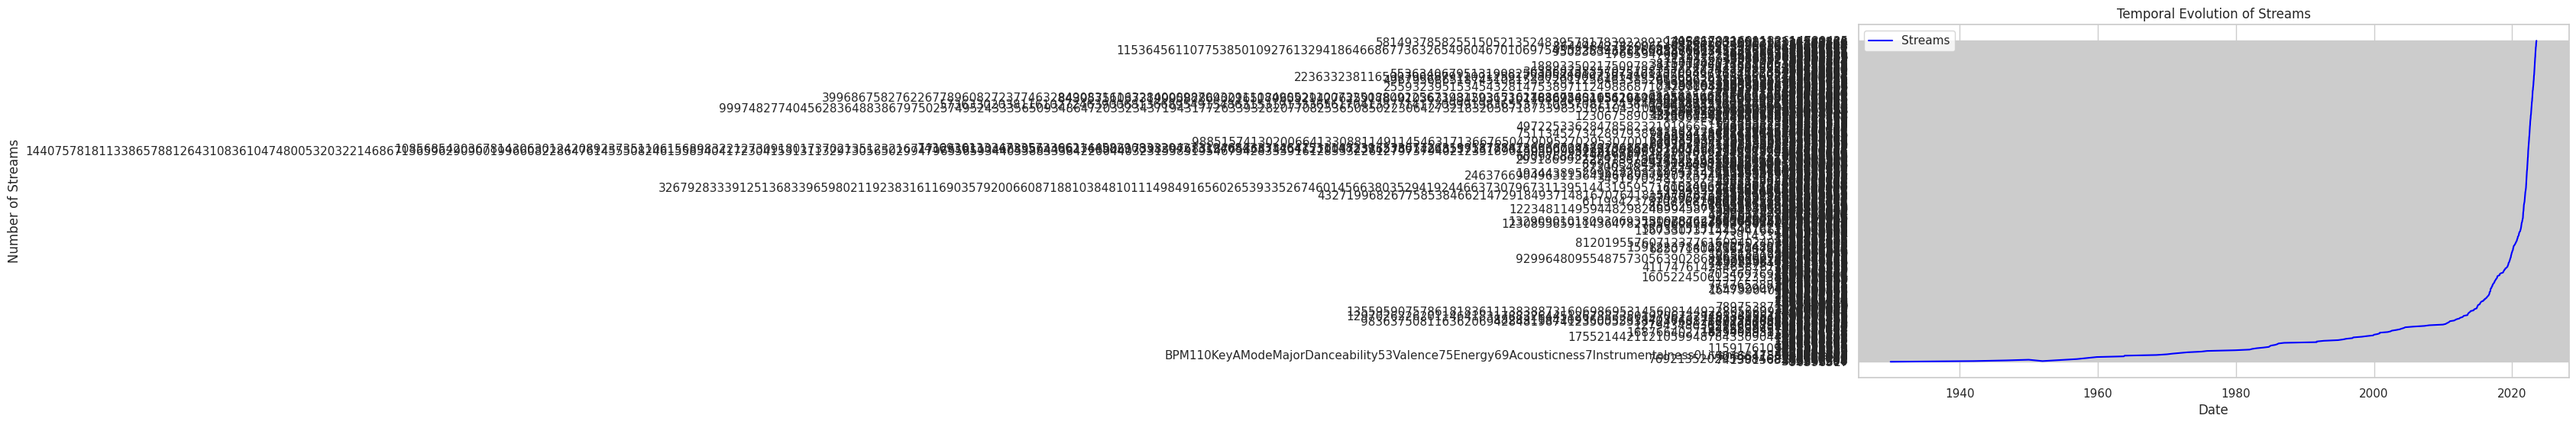

In [89]:
streams_by_date = df.groupby('date')['streams'].sum()

# Plot time series for streams
plt.figure(figsize=(12, 6))
plt.plot(streams_by_date.index, streams_by_date.values, label='Streams', color='blue')
plt.title('Temporal Evolution of Streams')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.show()


                               track_name  year     streams
0  Better Than Revenge (Taylor's Version)  2023  30343206.0
1          Danger (Spider) (Offset & JID)  2023  24975653.0
2             Gol Bolinha, Gol Quadrado 2  2023  11956641.0
3                       Jhoome Jo Pathaan  2022   1365184.0
4                               New Jeans  2023  29562220.0
5                               Overdrive  2023  14780425.0
6                                   QUEMA  2023  11599388.0
7                             Que Vuelvas  2022      2762.0
8                                    Rush  2023  22581161.0
9                                     S91  2023  16011326.0


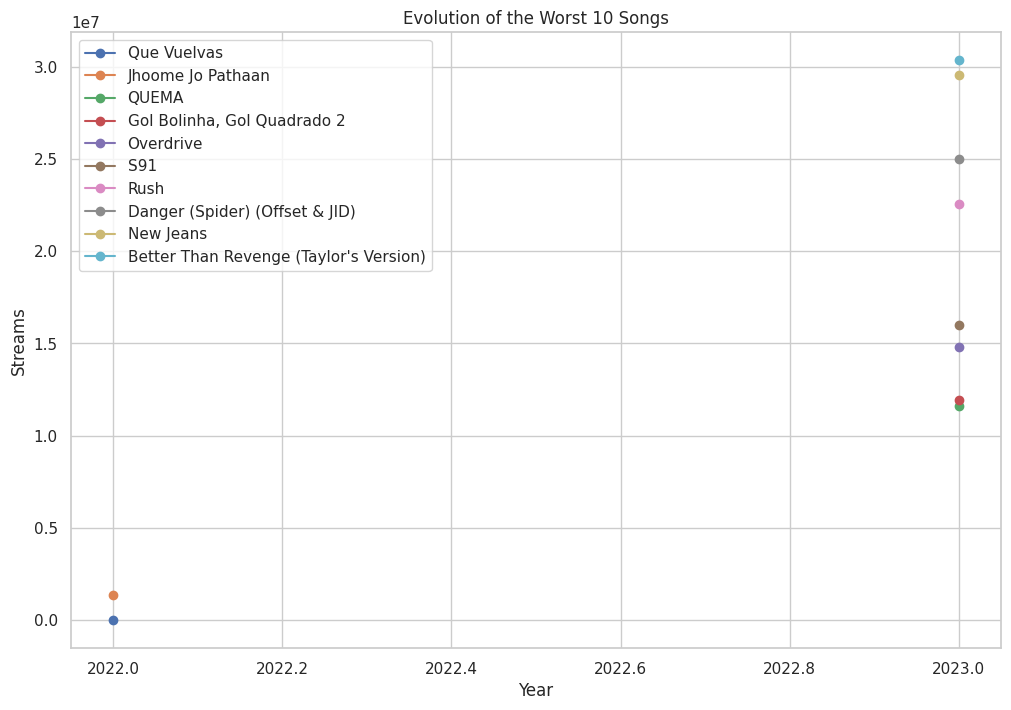

In [92]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#Filter to Obtain Only the Worst 10 Songs
worst_songs = df.nsmallest(10, 'streams')

# Create the 'year' column by extracting the year from the 'date' column
worst_songs['year'] = pd.to_datetime(worst_songs['date']).dt.year

# List the names and stream counts per year
streams_by_year = worst_songs.groupby(['track_name', 'year'])['streams'].sum().reset_index()

# Display the results table
print(streams_by_year)

# Plot the evolution of the worst 10 songs
plt.figure(figsize=(12, 8))
for index, row in worst_songs.iterrows():
    plt.plot(row['year'], row['streams'], marker='o', label=row['track_name'])

plt.title('Evolution of the Worst 10 Songs')
plt.xlabel('Year')
plt.ylabel('Streams')
plt.legend()
plt.show()


#Audio analysis.

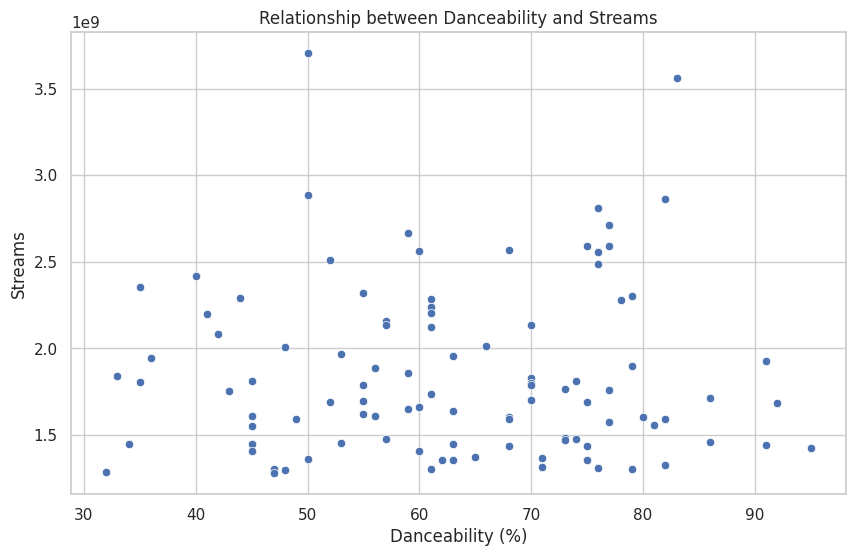

Correlation coefficient: 0.008095566898963192


In [93]:
top_songs = df.nlargest(100, 'streams')

# Visualization of Danceability Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='streams', data=top_songs)
plt.title('Relationship between Danceability and Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()

# Correlation Analysis
correlation = top_songs['danceability_%'].corr(top_songs['streams'])
print(f"Correlation coefficient: {correlation}")


A correlation coefficient of 0.0081 indicates a very weak correlation, close to zero, between the two variables in question. In practical terms, this suggests that there is no strong linear relationship between the danceability percentage and the number of streams for the analyzed songs.

General interpretation of correlation coefficients:

Close to 1: Strong positive correlation. As one variable increases, the other tends to increase.
Close to -1: Strong negative correlation. As one variable increases, the other tends to decrease.
Close to 0: Weak or no correlation. There is no strong linear relationship between the variables.
In this case, the coefficient close to zero indicates that variations in the danceability percentage are not linearly related to variations in the number of streams. It is important to note that correlation does not imply causation, and other variables or factors may influence the popularity of a song.


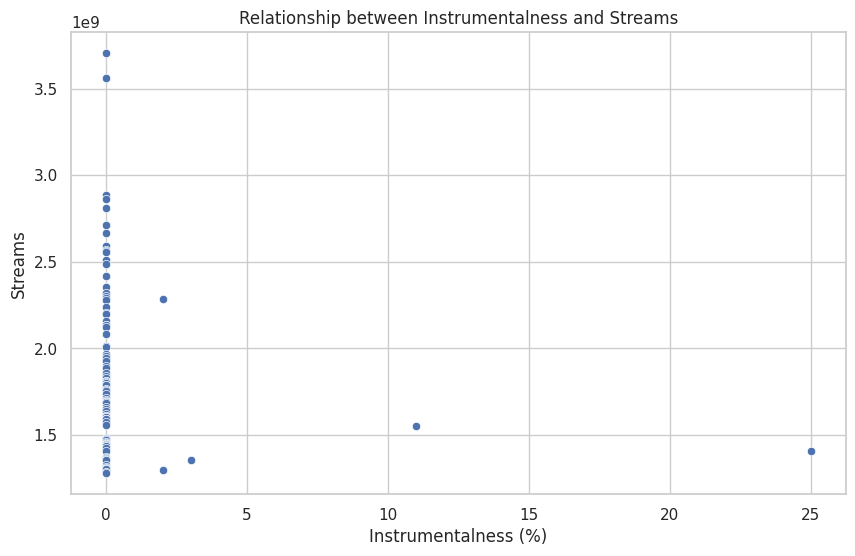

Correlation coefficient (Instrumentalness): -0.12144987997725512


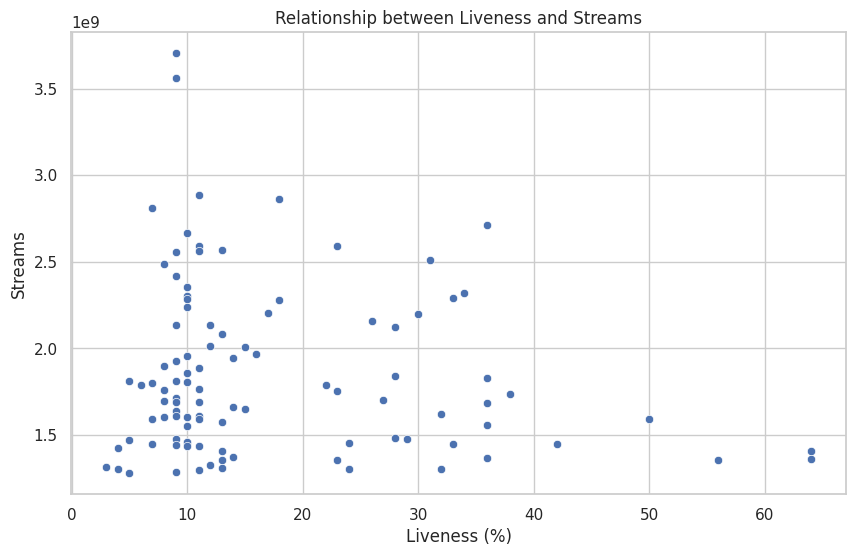

Correlation coefficient (Liveness): -0.14142638512204228


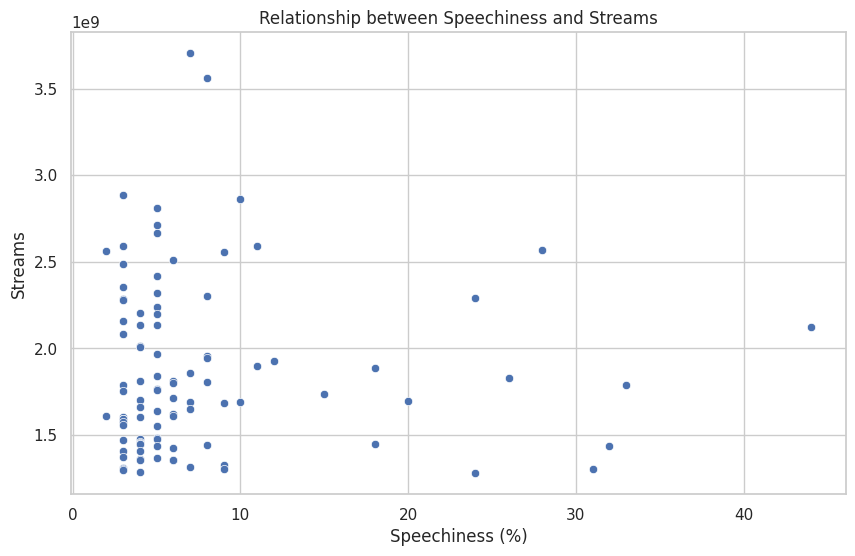

Correlation coefficient (Speechiness): 0.008872922013984832


In [94]:
top_songs = df.nlargest(100, 'streams')

# Visualization of Instrumentalness Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instrumentalness_%', y='streams', data=top_songs)
plt.title('Relationship between Instrumentalness and Streams')
plt.xlabel('Instrumentalness (%)')
plt.ylabel('Streams')
plt.show()

# Correlation Analysis for Instrumentalness
correlation_instrumentalness = top_songs['instrumentalness_%'].corr(top_songs['streams'])
print(f"Correlation coefficient (Instrumentalness): {correlation_instrumentalness}")

# Visualization of Liveness Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='liveness_%', y='streams', data=top_songs)
plt.title('Relationship between Liveness and Streams')
plt.xlabel('Liveness (%)')
plt.ylabel('Streams')
plt.show()

# Correlation Analysis for Liveness
correlation_liveness = top_songs['liveness_%'].corr(top_songs['streams'])
print(f"Correlation coefficient (Liveness): {correlation_liveness}")

# Visualization of Speechiness Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speechiness_%', y='streams', data=top_songs)
plt.title('Relationship between Speechiness and Streams')
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams')
plt.show()

# Correlation Analysis for Speechiness
correlation_speechiness = top_songs['speechiness_%'].corr(top_songs['streams'])
print(f"Correlation coefficient (Speechiness): {correlation_speechiness}")


In [95]:
#Number of track
print(f'Number of tracks : {df.track_name.nunique()}')

#Number of artist(s)
print(f'Number of artist(s) : {df["artist(s)_name"].nunique()}')



Number of tracks : 943
Number of artist(s) : 645


#Music app analysis.

In [96]:
in_playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Display the count of songs in each number of playlists for each platform
for col in in_playlists:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- in_spotify_playlists ---
1150     3
1112     3
356      3
86       3
3006     3
        ..
2598     1
542      1
2459     1
10624    1
1320     1
Name: in_spotify_playlists, Length: 879, dtype: int64


--- in_apple_playlists ---
0      23
8      22
10     20
20     20
4      20
       ..
344     1
238     1
216     1
492     1
102     1
Name: in_apple_playlists, Length: 234, dtype: int64


--- in_deezer_playlists ---
0        24
15       23
5        20
13       20
8        18
         ..
386       1
135       1
181       1
1,509     1
328       1
Name: in_deezer_playlists, Length: 348, dtype: int64




These results show the distribution of songs based on the number of playlists on the Spotify, Apple, and Deezer platforms. Here are some general observations:

**in_spotify_playlists:**
- Most songs seem to have a low number of inclusions in Spotify playlists.
- Some songs have a higher number of inclusions, such as 3 songs that are in 1150 Spotify playlists.

**in_apple_playlists:**
- A significant number of songs (23) are not included in any Apple Music playlist (value 0).
- There are songs with different levels of inclusion in Apple Music playlists.

**in_deezer_playlists:**
- Similar to Apple Music, some songs are not included in any Deezer playlist (value 0).
- There is a variety in the number of inclusions in Deezer playlists.

In [98]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')
df['mode'] = pd.to_numeric(df['mode'], errors='coerce')

                                    track_name  \
757                     Get Lucky - Radio Edit   
630                             Mr. Brightside   
720                    Wake Me Up - Radio Edit   
624  Smells Like Teen Spirit - Remastered 2021   
199                                 Take On Me   
..                                         ...   
507                                      Pepas   
134                                        505   
165                                 Sure Thing   
695                                  Adore You   
43                               See You Again   

                                 artist(s)_name  artist_count  released_year  \
757  Pharrell Williams, Nile Rodgers, Daft Punk             3           2013   
630                                 The Killers             1           2003   
720                                      Avicii             1           2013   
624                                     Nirvana             1           1991   

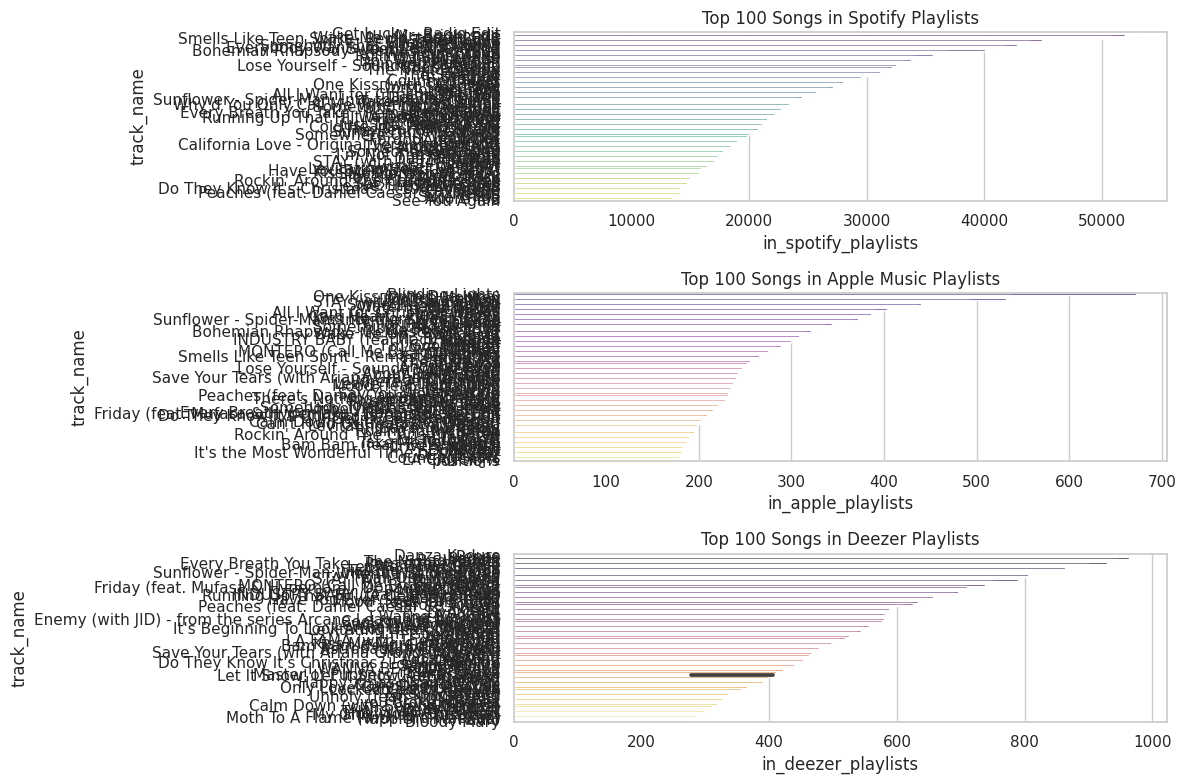

In [100]:
#Define a Function to Get the Top 100 Songs by Platform
def top_n_songs_by_platform(df, platform_col, n=100):
    return df.sort_values(by=platform_col, ascending=False).head(n)

# Get the Tops for Each Platform
top_spotify = top_n_songs_by_platform(df, 'in_spotify_playlists')
top_apple = top_n_songs_by_platform(df, 'in_apple_playlists')
top_deezer = top_n_songs_by_platform(df, 'in_deezer_playlists')

# Visualization
plt.figure(figsize=(12, 8))

# Subplot for Spotify
plt.subplot(3, 1, 1)
sns.barplot(x='in_spotify_playlists', y='track_name', data=top_spotify, palette='viridis')
plt.title('Top 100 Songs in Spotify Playlists')
print(top_spotify)

# Subplot for Apple Music
plt.subplot(3, 1, 2)
sns.barplot(x='in_apple_playlists', y='track_name', data=top_apple, palette='plasma')
plt.title('Top 100 Songs in Apple Music Playlists')
print(top_apple)

# Subplot for Deezer
plt.subplot(3, 1, 3)
sns.barplot(x='in_deezer_playlists', y='track_name', data=top_deezer, palette='inferno')
plt.title('Top 100 Songs in Deezer Playlists')
print(top_deezer)

plt.tight_layout()
plt.show()



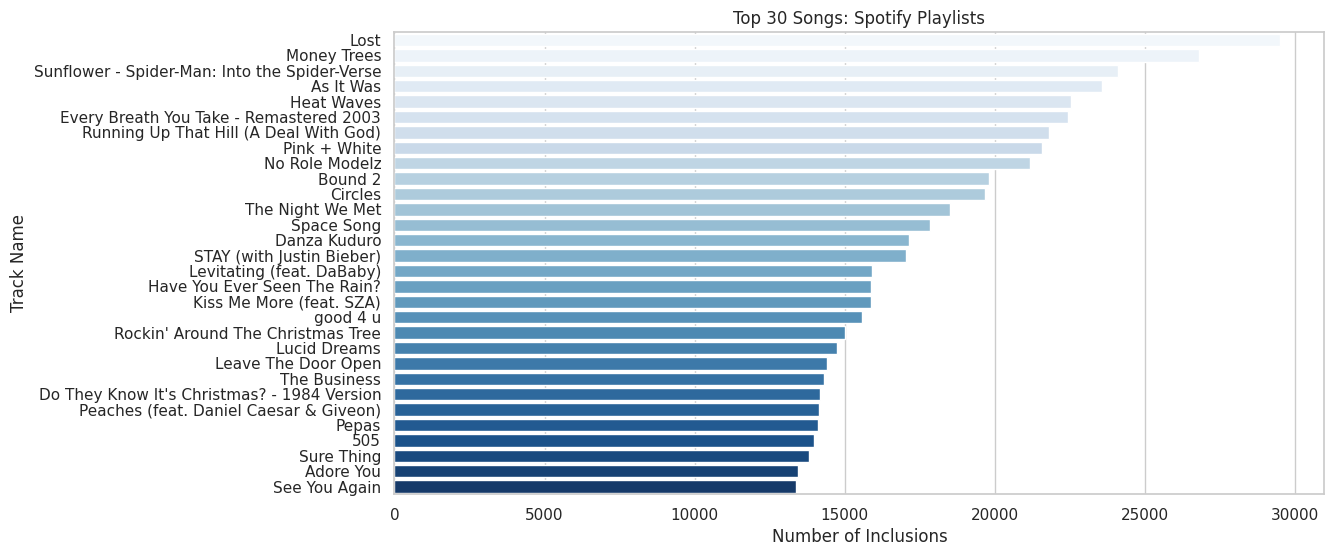

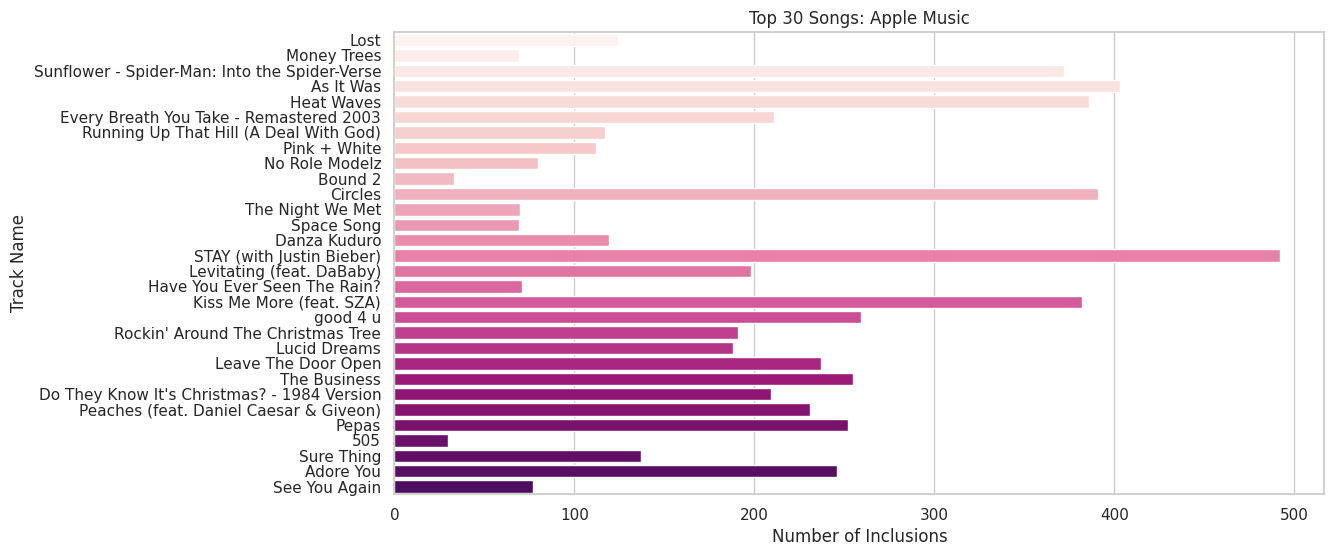

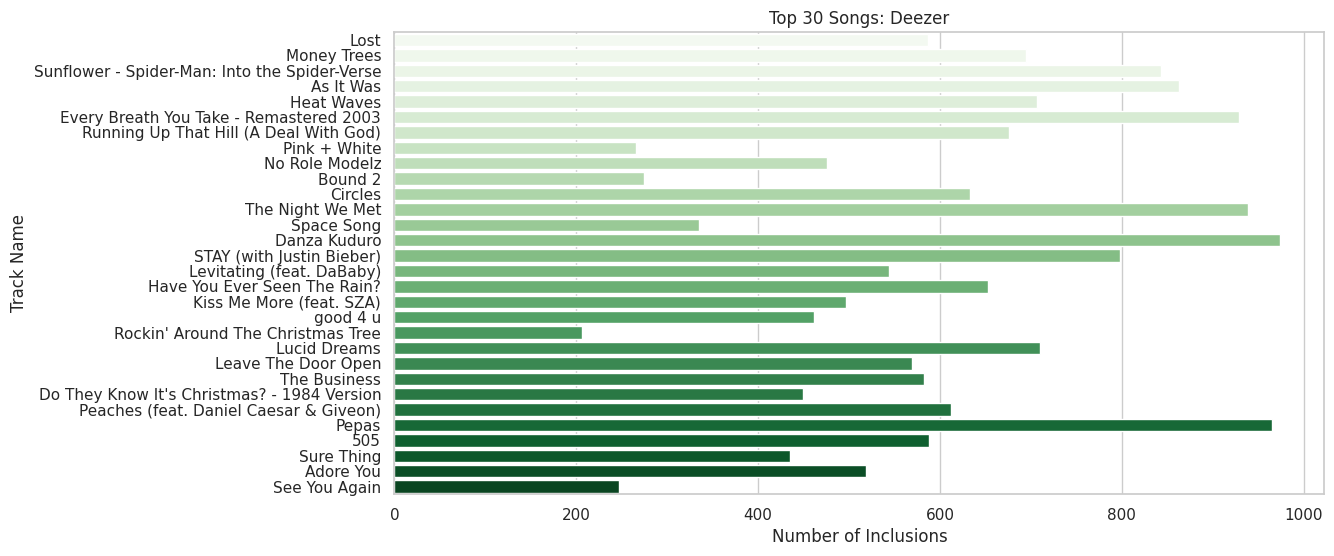

In [101]:

filtered_df = df[df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists'] > 0]


sorted_df = filtered_df.sort_values(by=['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], ascending=False)

top_30_songs = sorted_df.head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x='in_spotify_playlists', y='track_name', data=top_30_songs, palette='Blues')
plt.title('Top 30 Songs: Spotify Playlists')
plt.xlabel('Number of Inclusions')
plt.ylabel('Track Name')
plt.show()



plt.figure(figsize=(12, 6))
sns.barplot(x='in_apple_playlists', y='track_name', data=top_30_songs, palette='RdPu')
plt.title('Top 30 Songs: Apple Music')
plt.xlabel('Number of Inclusions')
plt.ylabel('Track Name')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='in_deezer_playlists', y='track_name', data=top_30_songs, palette='Greens')
plt.title('Top 30 Songs: Deezer')
plt.xlabel('Number of Inclusions')
plt.ylabel('Track Name')
plt.show()


In [31]:
print("Top 30 Songs - Spotify:")
print(top_30_songs[['track_name', 'streams', 'in_spotify_playlists']])

print("\nTop 30 Songs - Apple Music:")
print(top_30_songs[['track_name', 'streams', 'in_apple_playlists']])

print("\nTop 30 Songs - Deezer:")
print(top_30_songs[['track_name', 'streams', 'in_deezer_playlists']])

Top 30 Songs - Spotify:
                                        track_name       streams  \
657                                           Lost  8.222397e+08   
110                                    Money Trees  1.093606e+09   
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09   
14                                       As It Was  2.513188e+09   
71                                      Heat Waves  2.557976e+09   
166        Every Breath You Take - Remastered 2003  1.593271e+09   
424         Running Up That Hill (A Deal With God)  1.024858e+09   
186                                   Pink + White  8.063971e+08   
115                                 No Role Modelz  1.791001e+09   
902                                        Bound 2  7.033017e+08   
187                                        Circles  2.132336e+09   
167                               The Night We Met  1.410089e+09   
395                                     Space Song  7.897539e+08   
152                     

Top 30 most played songs on Spotify, Apple Music, and Deezer, along with the number of streams and the number of playlist inclusions for each platform.

To interpret the results:

- **track_name:** Song name.
- **streams:** Total number of streams for the song on the respective platform.
- **in_spotify_playlists, in_apple_playlists, in_deezer_playlists:** Number of playlists in which the song is included on each platform.

Observations:

- Some songs, such as "Lost," "Money Trees," and "Sunflower," are very popular and are present in several playlists on each platform.
- The number of playlist inclusions can vary significantly between platforms for the same song.
- Differences in user preferences on each platform may be noticeable based on the most played songs and participation in playlists.

# Based on the provided information and the conducted analyses, here are some conclusions and observations:

**Playlist Inclusion:**
- Inclusion in playlists on platforms like Spotify, Apple Music, and Deezer appears to influence the popularity of songs.
- Some songs are present in a large number of playlists, which could contribute to their success.

**Temporal Analysis:**
- The variation of certain metrics over the years has been explored, but it would be beneficial to delve deeper into how these metrics change over time to better understand trends and preferences throughout the years. A broader dataset would be helpful.

**Top Artists and Songs:**
- The top 10 most listened-to artists and songs have been identified, providing valuable insights into user preferences. Understanding how artists like Taylor Swift maintain their popularity over time.

**Audio Analysis:**
- Audio variables such as danceability, valence, energy, among others, have been explored, but a clear correlation between these variables has not been identified.

**KEY Analysis:**
- Analysis of the 'key' variable could reveal interesting patterns about the tonality of songs and its relationship with popularity.